<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-Time-Series-Models---Lab" data-toc-modified-id="Basic-Time-Series-Models---Lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic Time Series Models - Lab</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#A-White-Noise-Model" data-toc-modified-id="A-White-Noise-Model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>A White Noise Model</a></span></li><li><span><a href="#A-Random-Walk-Model" data-toc-modified-id="A-Random-Walk-Model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>A Random Walk Model</a></span></li><li><span><a href="#Random-Walk-with-a-Drift" data-toc-modified-id="Random-Walk-with-a-Drift-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Random Walk with a Drift</a></span></li><li><span><a href="#Differencing-in-a-Random-Walk-model" data-toc-modified-id="Differencing-in-a-Random-Walk-model-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Differencing in a Random Walk model</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

# Basic Time Series Models - Lab

## Introduction

Now that you have an initial understanding of the the White Noise and the Random Walk model, let's try to generate some examples!

## Objectives

You will be able to:
- Explain what the goal is of time series modeling
- Understand and explain what a White Noise model is
- Understand and explain what a Random Walk model is
- Understand the mathematical formulations of Random Walk and White Noise models

## A White Noise Model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September and October 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day.
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes. 
- Create and visualize a time series that reflects this information.

**Referenced:**
> * https://machinelearningmastery.com/white-noise-time-series-python/
> * https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

Let's import pandas, numpy and matplotlib.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(12) # do not change this seed.

Create the dates. You can do this using `pd.date_range`, more info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [5]:
# your code here
dates = pd.date_range(start='2018-08-01', end='2018-10-31')
print(len(dates))

92


Generate the values for the wite noise process representing Nina's commute in August and September.

In [7]:
from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot

In [9]:
# your code here
commute = np.random.normal(25,4,len(dates))
print(commute)

[22.24448523 28.2105218  26.08956416 21.12329401 28.48787249 19.21456223
 22.85407494 25.79168207 19.53744074 20.22222247 25.06373817 24.67982615
 23.99678915 22.73942842 20.58931224 21.87087024 37.16674483 22.49567512
 31.02360365 22.65065565 30.46341166 29.9281795  26.80355693 22.43436073
 19.48961587 28.86298539 19.86398616 19.9017116  31.09136705 30.84752972
 25.15062385 24.0152112  22.34280971 26.40534215 23.06387427 18.94765096
 21.94587805 25.99681284 18.64076557 21.08189631 25.49104652 31.75716838
 25.71099946 25.12802408 32.73286226 20.75162115 22.0694836  28.37096557
 29.30695995 26.83076215 14.52202671 27.95618537 27.67000423 25.18561054
 27.66431039 30.63179394 25.20459675 21.25610056 17.64356277 25.25511491
 22.14412761 22.75246135 20.4701246  26.09716401 27.94364844 26.737275
 20.51983558 28.55637844 26.25802778 15.04798214 27.38363444 16.85655185
 20.44687339 29.23056915 27.61107416 22.42213259 21.46615164 26.38276949
 17.81269016 26.64283848 23.8327062  27.93659059 24.4

Create a time series with the dates and the commute times.

In [30]:
# your code here
ts = pd.Series(commute, index=dates)
print(ts[:5])

2018-08-01    22.244485
2018-08-02    28.210522
2018-08-03    26.089564
2018-08-04    21.123294
2018-08-05    28.487872
Freq: D, dtype: float64


Visualize the time series and set appropriate axis labels.

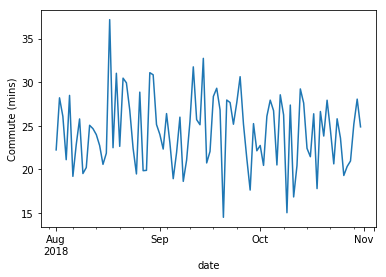

In [39]:
ax = ts.plot()

ax.set_ylabel('Commute (mins)')
ax.set_xlabel('date')
plt.show()

Print Nina's shortest and longest commute.

In [40]:
# your code here
print(ts.min())

14.522026709957242


In [41]:
# your code here
print(ts.max())

37.16674482548859


Look at the distribution of commute times.

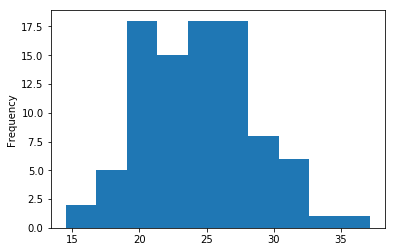

In [47]:
# your code here
ax = ts.plot(kind='hist')

Compute the standard deviation and the mean of the commute series. The fact that the mean and standard error are constant over time is crucial!

In [48]:
# your code here
ts.describe()

count    92.000000
mean     24.373433
std       4.147899
min      14.522027
25%      21.112945
50%      24.782883
75%      27.440494
max      37.166745
dtype: float64

In [ ]:
# your code here

Now, let's look at the mean and standard error for August and October respectively. 

In [50]:
# your code here
aug_series = ts['08-2018']
oct_series = ts['10-2018']

In [54]:
aug_series.describe()

count    31.000000
mean     24.867409
std       4.478207
min      19.214562
25%      21.497082
50%      23.996789
75%      28.349197
max      37.166745
dtype: float64

In [55]:
oct_series.describe()

count    31.000000
mean     23.733632
std       3.769916
min      15.047982
25%      20.582883
50%      24.498017
75%      26.690057
max      29.230569
dtype: float64

Because you've generated this data, you know that the mean and constant will be the same over time. But comparing mean and standard deviation over time is useful practice for real data examples to check if a process is White Noise!

## A Random Walk Model

Remember from the lecture that the Random Walk Model:

- Has no specified mean or variance
- Has a strong depencence over time

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model:
- starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) in 2010 until end of november of the same year, generate a random walk model with a white noise error term, which has a standard error of 10.

In [61]:
# keep the random seed
np.random.seed(11)

# create a series with the specified dates
dates = pd.date_range('2010-01-01', '2010-11-30')
len(dates)

error = np.random.normal(0,10,len(dates))

def random_walk(start, error):        
    Y_0 = start
    cum_error = np.cumsum(error)
    Y = cum_error + Y_0 
    return Y

shares_value = random_walk(1000, error)

shares_series =  pd.Series(shares_value, index=dates)

Visualize the time series with correct axis labels

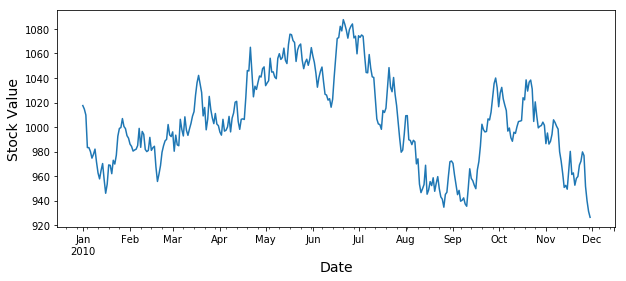

In [62]:
# your code here
ax = shares_series.plot(figsize=(10,4))
ax.set_ylabel('Stock Value', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
plt.show()

You can see how this very much looks like the exchange rate series you looked at in the lecture!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

In [63]:
# keep the random seed
np.random.seed(11)

# Series with specified dates:
dates = pd.date_range('2010-01-01', '2010-11-30')
len(dates)

error = np.random.normal(0,10,len(dates))

def random_walk(start, error):        
    Y_0 = start
    cum_error = np.cumsum(error + 8)
    Y = cum_error + Y_0 
    return Y

shares_value_drift = random_walk(1000, error)

shares_series_drift =  pd.Series(shares_value_drift, index=dates)

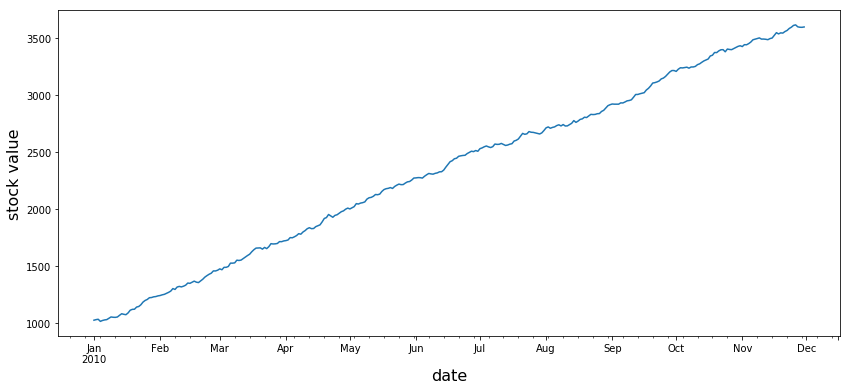

In [64]:
# your code here
ax = shares_series_drift.plot(figsize=(14,6))
ax.set_ylabel("stock value", fontsize=16)
ax.set_xlabel("date", fontsize=16)
plt.show()

Note that there is a very strong drift here!

## Differencing in a Random Walk model

One important property of the Random Walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series for the shares time series (no drift).

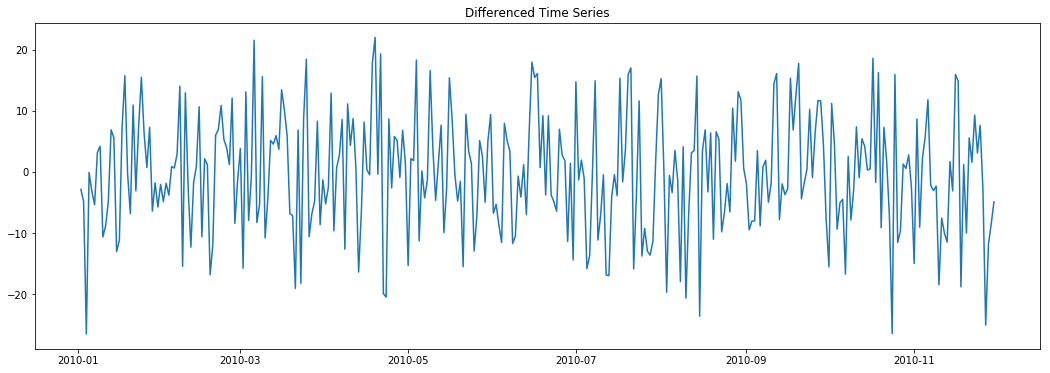

In [65]:
# your code here
shares_diff = shares_series.diff(periods=1)

fig = plt.figure(figsize=(18,6))
plt.plot(shares_diff)
plt.title('Differenced Time Series')
plt.show()

This does look a lot like a white noise series!

Plot the differenced time series for the shares time series (with a drift).

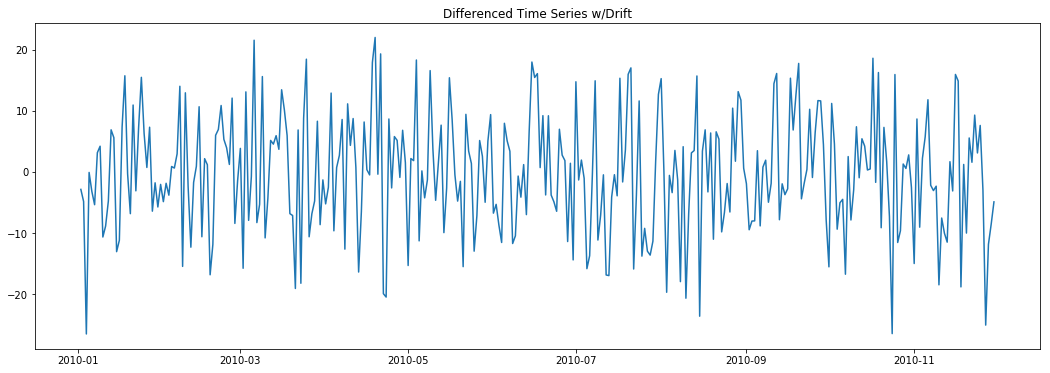

In [66]:
# your code here
shares_drift_diff = shares_series_drift.diff(periods=1)

fig = plt.figure(figsize=(18,6))
plt.plot(shares_diff)
plt.title('Differenced Time Series w/Drift')
plt.show()

This is also a white noise series, but what can you tell about the mean?

The mean is equal to the drift $c$, so 8 for this example!

## Summary

Great, you now know how a Random Walk and Moving Average model work!